## Imported Libraries

In [1]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/PEA01.20231009T211012.csv")

In [5]:
df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [6]:
df.columns

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')

In [7]:
df.shape

(5994, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [9]:
df.isnull()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
5989,False,False,False,False,False,False
5990,False,False,False,False,False,False
5991,False,False,False,False,False,False
5992,False,False,False,False,False,False


### Scenario: Suppose you want to investigate whether there is an association between the "Sex" column (which has two categories: male and female) and a certain event, and you want to use the Binomial distribution to model this situation.

Hypothesis:
You hypothesize that there is a 20% chance that a person of a certain sex (e.g., male) will experience the event in a given year.

Steps to Analyze with Binomial Distribution:

Calculate the probability of success (p) for the Binomial distribution based on your hypothesis (e.g., p = 0.20).
Define the number of trials (n) as the total number of rows in your dataset (5994).
Use the Binomial distribution to calculate the probability mass function (PMF) for each value of k (number of successes) in the range from 0 to n. You can use the scipy.stats.binom.pmf function for this.

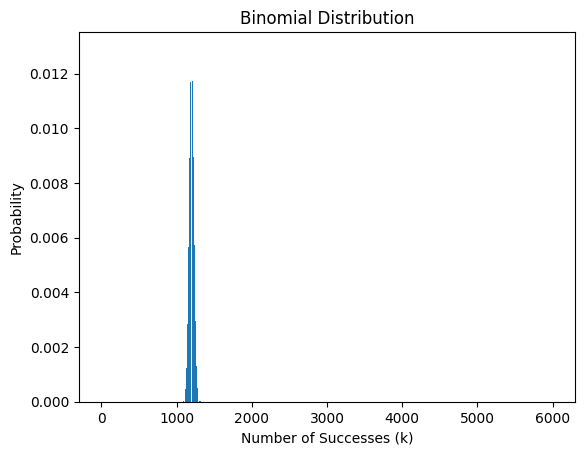

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Hypothesis
p = 0.20

# Total number of trials (rows in the dataset)
n = 5994

# Calculate PMF for each value of k (0 to n)
k_values = np.arange(0, n+1)
pmf = binom.pmf(k_values, n, p)

# Visualize the Binomial distribution
plt.bar(k_values, pmf)
plt.xlabel('Number of Successes (k)')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.show()


Steps to Analyze with Poisson Distribution:

Calculate the event rate (λ) as the average number of events per year. You can calculate this based on the dataset.
Use the Poisson distribution to calculate the PMF for each value of k (number of events) in a given year. You can use the scipy.stats.poisson.pmf function for this.
Here's some Python code to perform this analysis:

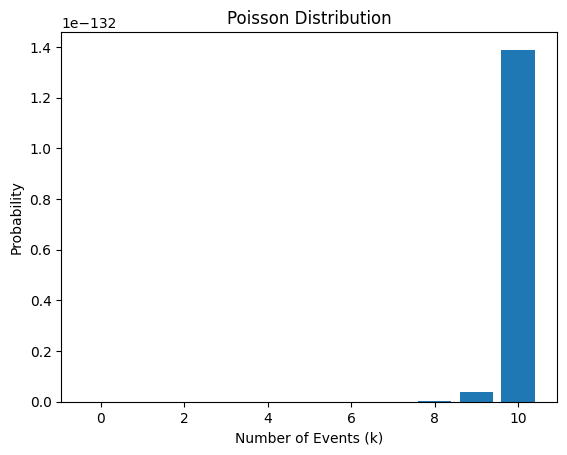

In [11]:
from scipy.stats import poisson

# Calculate the event rate (λ) based on your dataset
event_rate = df['VALUE'].mean()

# Define a range for k values (e.g., 0 to 10 events in a year)
k_values = np.arange(0, 11)

# Calculate PMF for each value of k
pmf = poisson.pmf(k_values, event_rate)

# Visualize the Poisson distribution
plt.bar(k_values, pmf)
plt.xlabel('Number of Events (k)')
plt.ylabel('Probability')
plt.title('Poisson Distribution')
plt.show()


In [12]:
# Calculate basic descriptive statistics for the 'VALUE' column
descriptive_stats = df['VALUE'].describe()
print(descriptive_stats)

count    5880.000000
mean      347.001088
std       601.822682
min         5.500000
25%        79.475000
50%       151.700000
75%       307.725000
max      5281.600000
Name: VALUE, dtype: float64


In [13]:
import pandas as pd

# Assuming you have your DataFrame df
mean_value = df['VALUE'].mean()
std_value = df['VALUE'].std()

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_value}")


Mean: 347.0010884353742
Standard Deviation: 601.8226824979947


Visualize the Data: Create a histogram or density plot to visualize the distribution of the "VALUE" column. This helps you visually assess whether the data appears to be roughly Normal or if there are deviations from Normality.

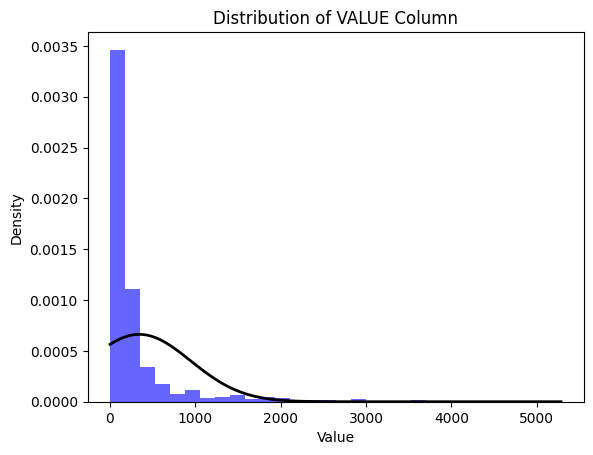

In [14]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(df['VALUE'], bins=30, density=True, alpha=0.6, color='b')

# Plot the Normal distribution for comparison
from scipy.stats import norm
x = np.linspace(df['VALUE'].min(), df['VALUE'].max(), 100)
pdf = norm.pdf(x, loc=mean_value, scale=std_value)
plt.plot(x, pdf, 'k-', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Distribution of VALUE Column')
plt.show()


In [15]:
# Calculate the correlation between 'Year' and 'VALUE'
correlation = df['Year'].corr(df['VALUE'])
print(f'Correlation between Year and VALUE: {correlation}')

Correlation between Year and VALUE: 0.11000544744512808


#### Freqvency analysis

In [16]:
# Calculate the frequency of each unique value in the 'Age Group' column
age_group_counts = df['Age Group'].value_counts()
print(age_group_counts)

Under 1 year         222
40 - 44 years        222
85 years and over    222
80 - 84 years        222
75 - 79 years        222
70 - 74 years        222
65 years and over    222
65 - 69 years        222
60 - 64 years        222
55 - 59 years        222
50 - 54 years        222
45 - 64 years        222
45 - 49 years        222
35 - 39 years        222
0 - 4 years          222
30 - 34 years        222
25 - 44 years        222
25 - 29 years        222
20 - 24 years        222
15 years and over    222
15 - 24 years        222
15 - 19 years        222
10 - 14 years        222
5 - 9 years          222
1 - 4 years          222
0 - 14 years         222
All ages             222
Name: Age Group, dtype: int64


## Statistics Test

### Hypothesis Testing (chi-test)

In [17]:
from scipy.stats import chi2_contingency

# Perform a chi-square test of independence between 'Age Group' and 'Sex'
contingency_table = pd.crosstab(df['Age Group'], df['Sex'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}')
print(f'P-value: {p}')


Chi-square statistic: 0.0
P-value: 1.0


## Exploratory data analysis

### Age Distribution Analysis

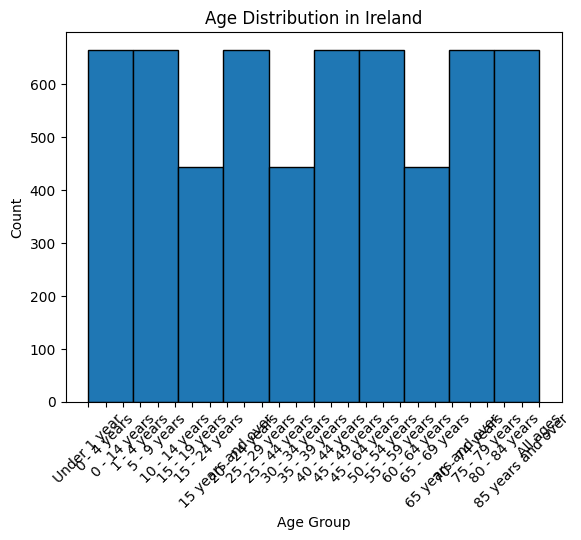

In [18]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the age distribution
plt.hist(df['Age Group'], bins=10, edgecolor='k')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution in Ireland')
plt.xticks(rotation=45)
plt.show()

## Annual Population Change

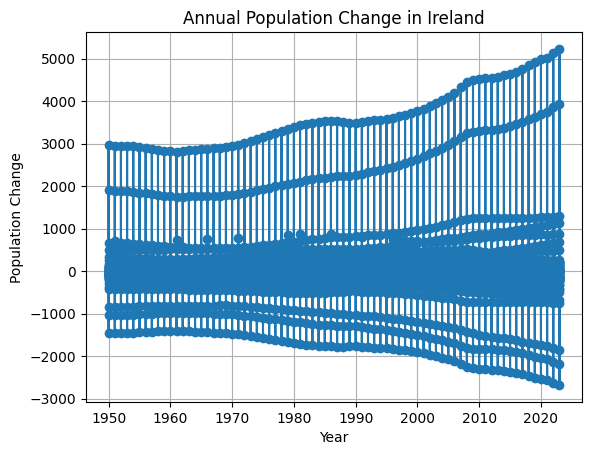

In [19]:
import matplotlib.pyplot as plt

# Calculate annual population change
df['Population Change'] = df.groupby('Year')['VALUE'].diff()

# Visualize annual population change
plt.plot(df['Year'], df['Population Change'], marker='o')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Annual Population Change in Ireland')
plt.grid(True)
plt.show()


# Population Forecasting (using a simple linear regression model)

## Gender Distribution

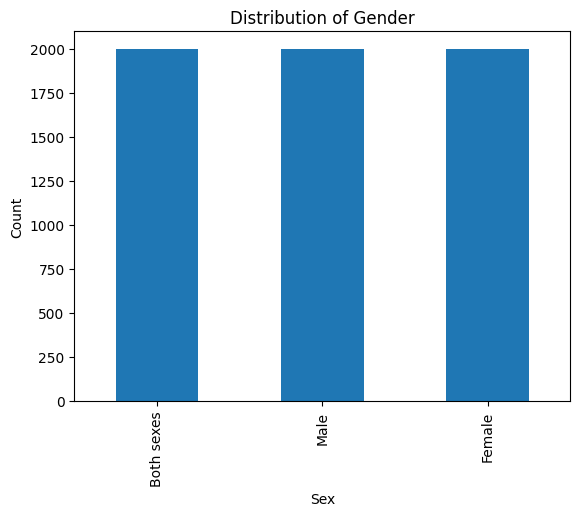

In [20]:
# Gender distribution
gender_counts = df['Sex'].value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


## Age vs. Population

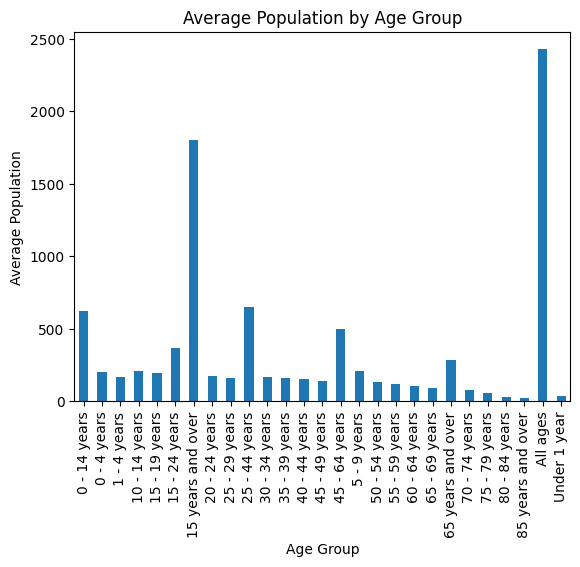

In [ ]:
# Group by age group and calculate average population
age_population = df.groupby('Age Group')['VALUE'].mean()
age_population.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.title('Average Population by Age Group')
plt.show()


## Yearly Population Change
#### Annual Population Change in Ireland (Indirect Indicator of Immigration and Migration

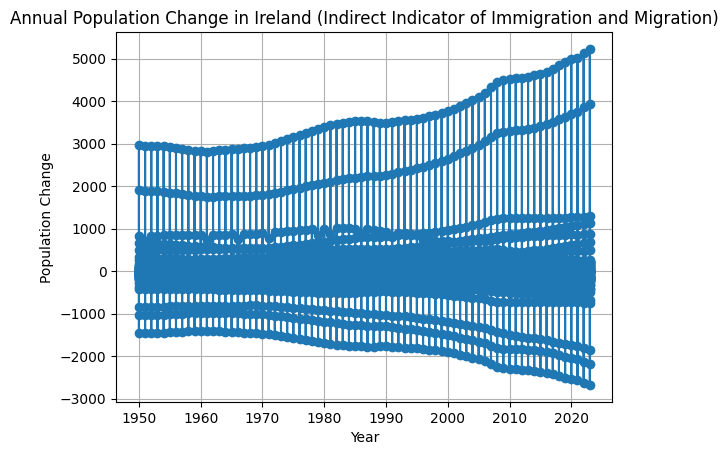

In [ ]:
import matplotlib.pyplot as plt

# Calculate annual population change
df['Population Change'] = df.groupby('Year')['VALUE'].diff()

# Visualize annual population change
plt.plot(df['Year'], df['Population Change'], marker='o')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Annual Population Change in Ireland (Indirect Indicator of Immigration and Migration)')
plt.grid(True)
plt.show()


## Population Forecasting in Ireland

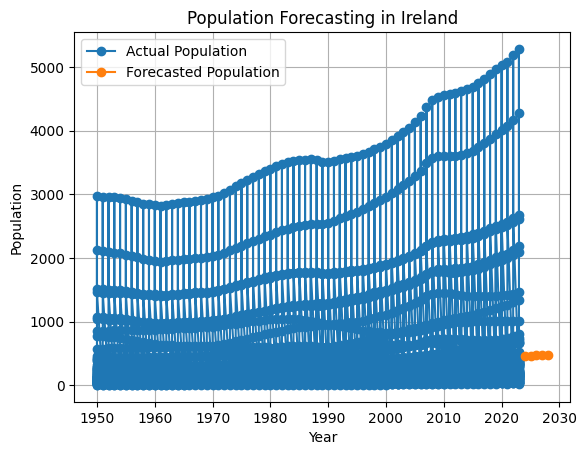

In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter rows with non-null population values
df = df.dropna(subset=['VALUE'])

# Create a linear regression model
model = LinearRegression()

# Prepare data for population forecasting
X = df[['Year']]
y = df['VALUE']

# Fit the model
model.fit(X, y)

# Predict population for future years (e.g., the next 5 years)
future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6)
future_population = model.predict(pd.DataFrame({'Year': future_years}))

# Visualize population forecasting
plt.plot(df['Year'], df['VALUE'], label='Actual Population', marker='o')
plt.plot(future_years, future_population, label='Forecasted Population', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasting in Ireland')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values count for each column
print(missing_values)


STATISTIC Label        0
Year                   0
Age Group              0
Sex                    0
UNIT                   0
VALUE                  0
Population Change    112
dtype: int64


In [23]:
# Calculate the mean of the "Population Change" column
mean_population_change = df['Population Change'].mean()

# Replace missing values with the mean
df['Population Change'].fillna(mean_population_change, inplace=True)


## RandomForestRegressor

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error


In [25]:
# Check the data types of all columns
data_types = df.dtypes
print(data_types)


STATISTIC Label       object
Year                   int64
Age Group             object
Sex                   object
UNIT                  object
VALUE                float64
Population Change    float64
dtype: object


In [26]:
# Drop rows with missing values in the target column
df.dropna(subset=['VALUE'], inplace=True)

In [27]:
# Perform one-hot encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['Age Group', 'Sex', 'UNIT'], drop_first=True)


In [28]:
# Split the data into features (X) and the target variable (y)
X = df_encoded.drop('VALUE', axis=1)
y = df_encoded['VALUE']

In [29]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Drop non-numeric columns
non_numeric_columns = ['STATISTIC Label']
X_train = X_train.drop(columns=non_numeric_columns)
X_test = X_test.drop(columns=non_numeric_columns)


In [31]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

In [32]:
# Hyperparameter Tuning with GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [33]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_absolute_error')

In [34]:
# Get the best hyperparameters
best_params = grid_search.best_params_

In [35]:
# Create a new Random Forest Regressoin with the best hyperparameters
best_rf_model = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    random_state=42
)

In [36]:
# Train the model on the training data
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [37]:
# Make predictions on the test data
predictions = best_rf_model.predict(X_test)


In [38]:
# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 6.682386904761921


In [39]:
from sklearn.metrics import mean_absolute_error


# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')


Mean Absolute Error (MAE): 6.682386904761921


In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean squared Error (MAE): {mse}')


Mean squared Error (MAE): 1312.5591207610514


In [41]:
import numpy as np
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f'mean_squared_error: {rmse}')


mean_squared_error: 36.22925780030625


In [42]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
print(f'r2_score: {r2}')



r2_score: 0.9958260261263535


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Load your dataset
# Replace 'YOUR_DATASET.csv' with the actual file path
df = pd.read_csv('/content/PEA01.20231009T211012.csv')

# Step 1: Data Preprocessing
# Drop rows with missing values
df.dropna(subset=['VALUE'], inplace=True)

# Remove the 'UNIT' column
df_encoded = df.drop('UNIT', axis=1)

# One-Hot Encoding for other categorical columns
df_encoded = pd.get_dummies(df_encoded, columns=['STATISTIC Label', 'Age Group', 'Sex'], drop_first=True)

# Step 2: Data Splitting (80% train, 20% test)
X = df_encoded.drop('VALUE', axis=1)  # Features
y = df_encoded['VALUE']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection (Support Vector Regressor)
svr_model = SVR()

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'epsilon': [0.1, 0.2, 0.3],  # Epsilon parameter
    'kernel': ['linear', 'rbf', 'poly']  # Kernel type
}

grid_search = GridSearchCV(estimator=svr_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Step 5: Train the Model with Best Hyperparameters
best_svr_model = SVR(
    C=best_params['C'],
    epsilon=best_params['epsilon'],
    kernel=best_params['kernel']
)

best_svr_model.fit(X_train, y_train)

# Step 6: Model Evaluation
predictions = best_svr_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# You can also further evaluate the model with other regression metrics if needed.


Mean Absolute Error (MAE): 99.16514977441257


In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [71]:
# Calculate R2 score
r2 = r2_score(y_test, predictions)
print(f'R-squared (R2) Score: {r2}')

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

R-squared (R2) Score: 0.7345147664243825
Mean Absolute Error (MAE): 99.16514977441257
Mean Squared Error (MSE): 83485.20506014343
